# Diabetes Prediction

In [1]:
import sys
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.insert(0, parent_dir)

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from implementations_from_scratch.logistic_regression_from_scratch import LogisticRegression as LR_from_scratch
from sklearn.linear_model import LogisticRegression


## Data Preprocessing

In [3]:
# Import data
dataset = pd.read_csv("../datasets/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


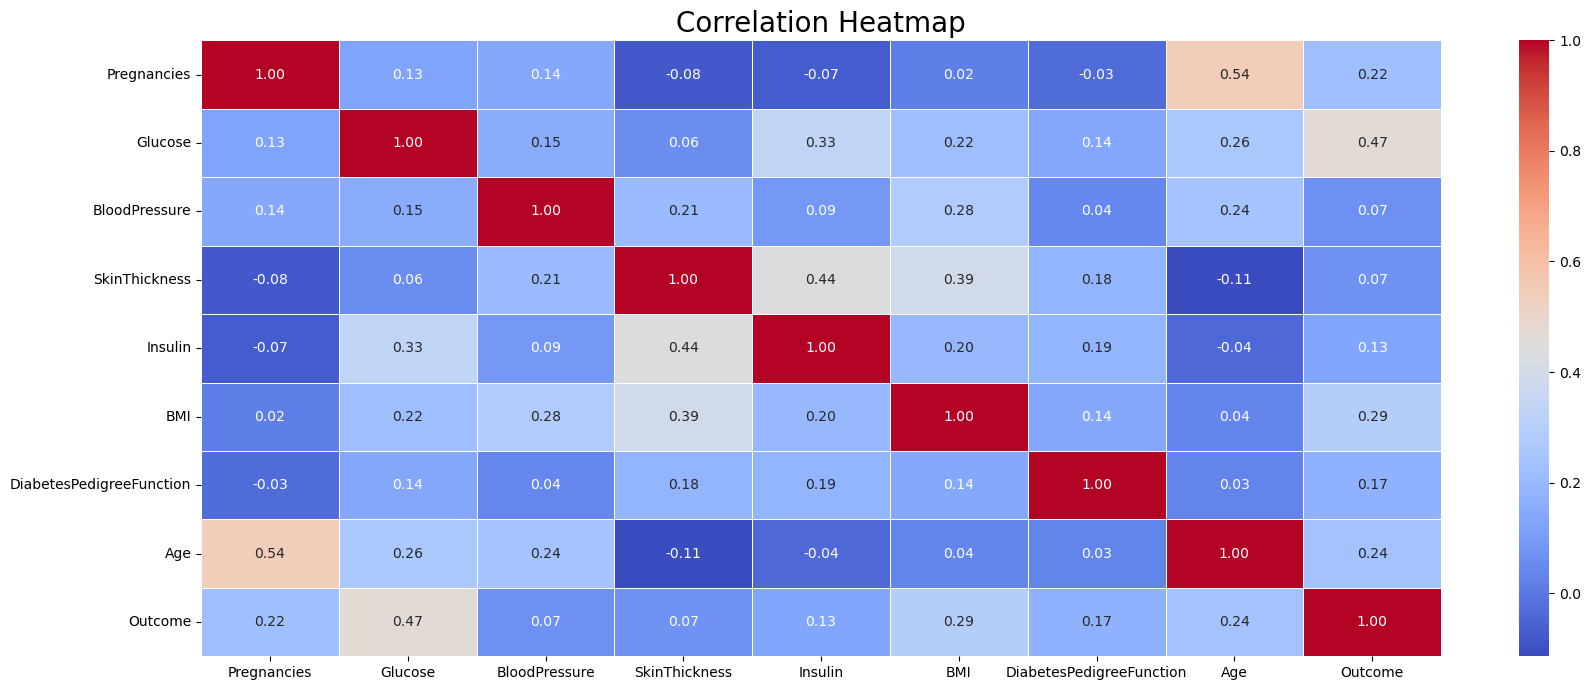

In [6]:
# Correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

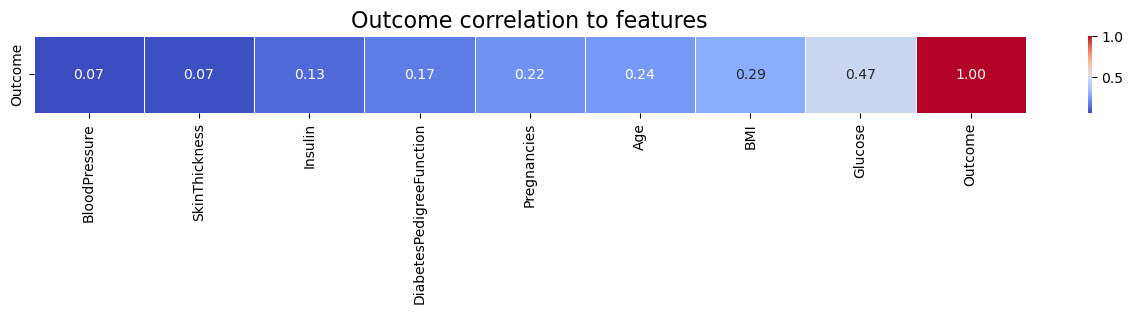

In [7]:
# Correlation for "Outcome"
outcome_corr = pd.DataFrame(dataset.corr()['Outcome'].sort_values(ascending=True))
plt.figure(figsize=(16, 1))
sns.heatmap(outcome_corr.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 
plt.title("Outcome correlation to features", fontsize=16)
plt.show()

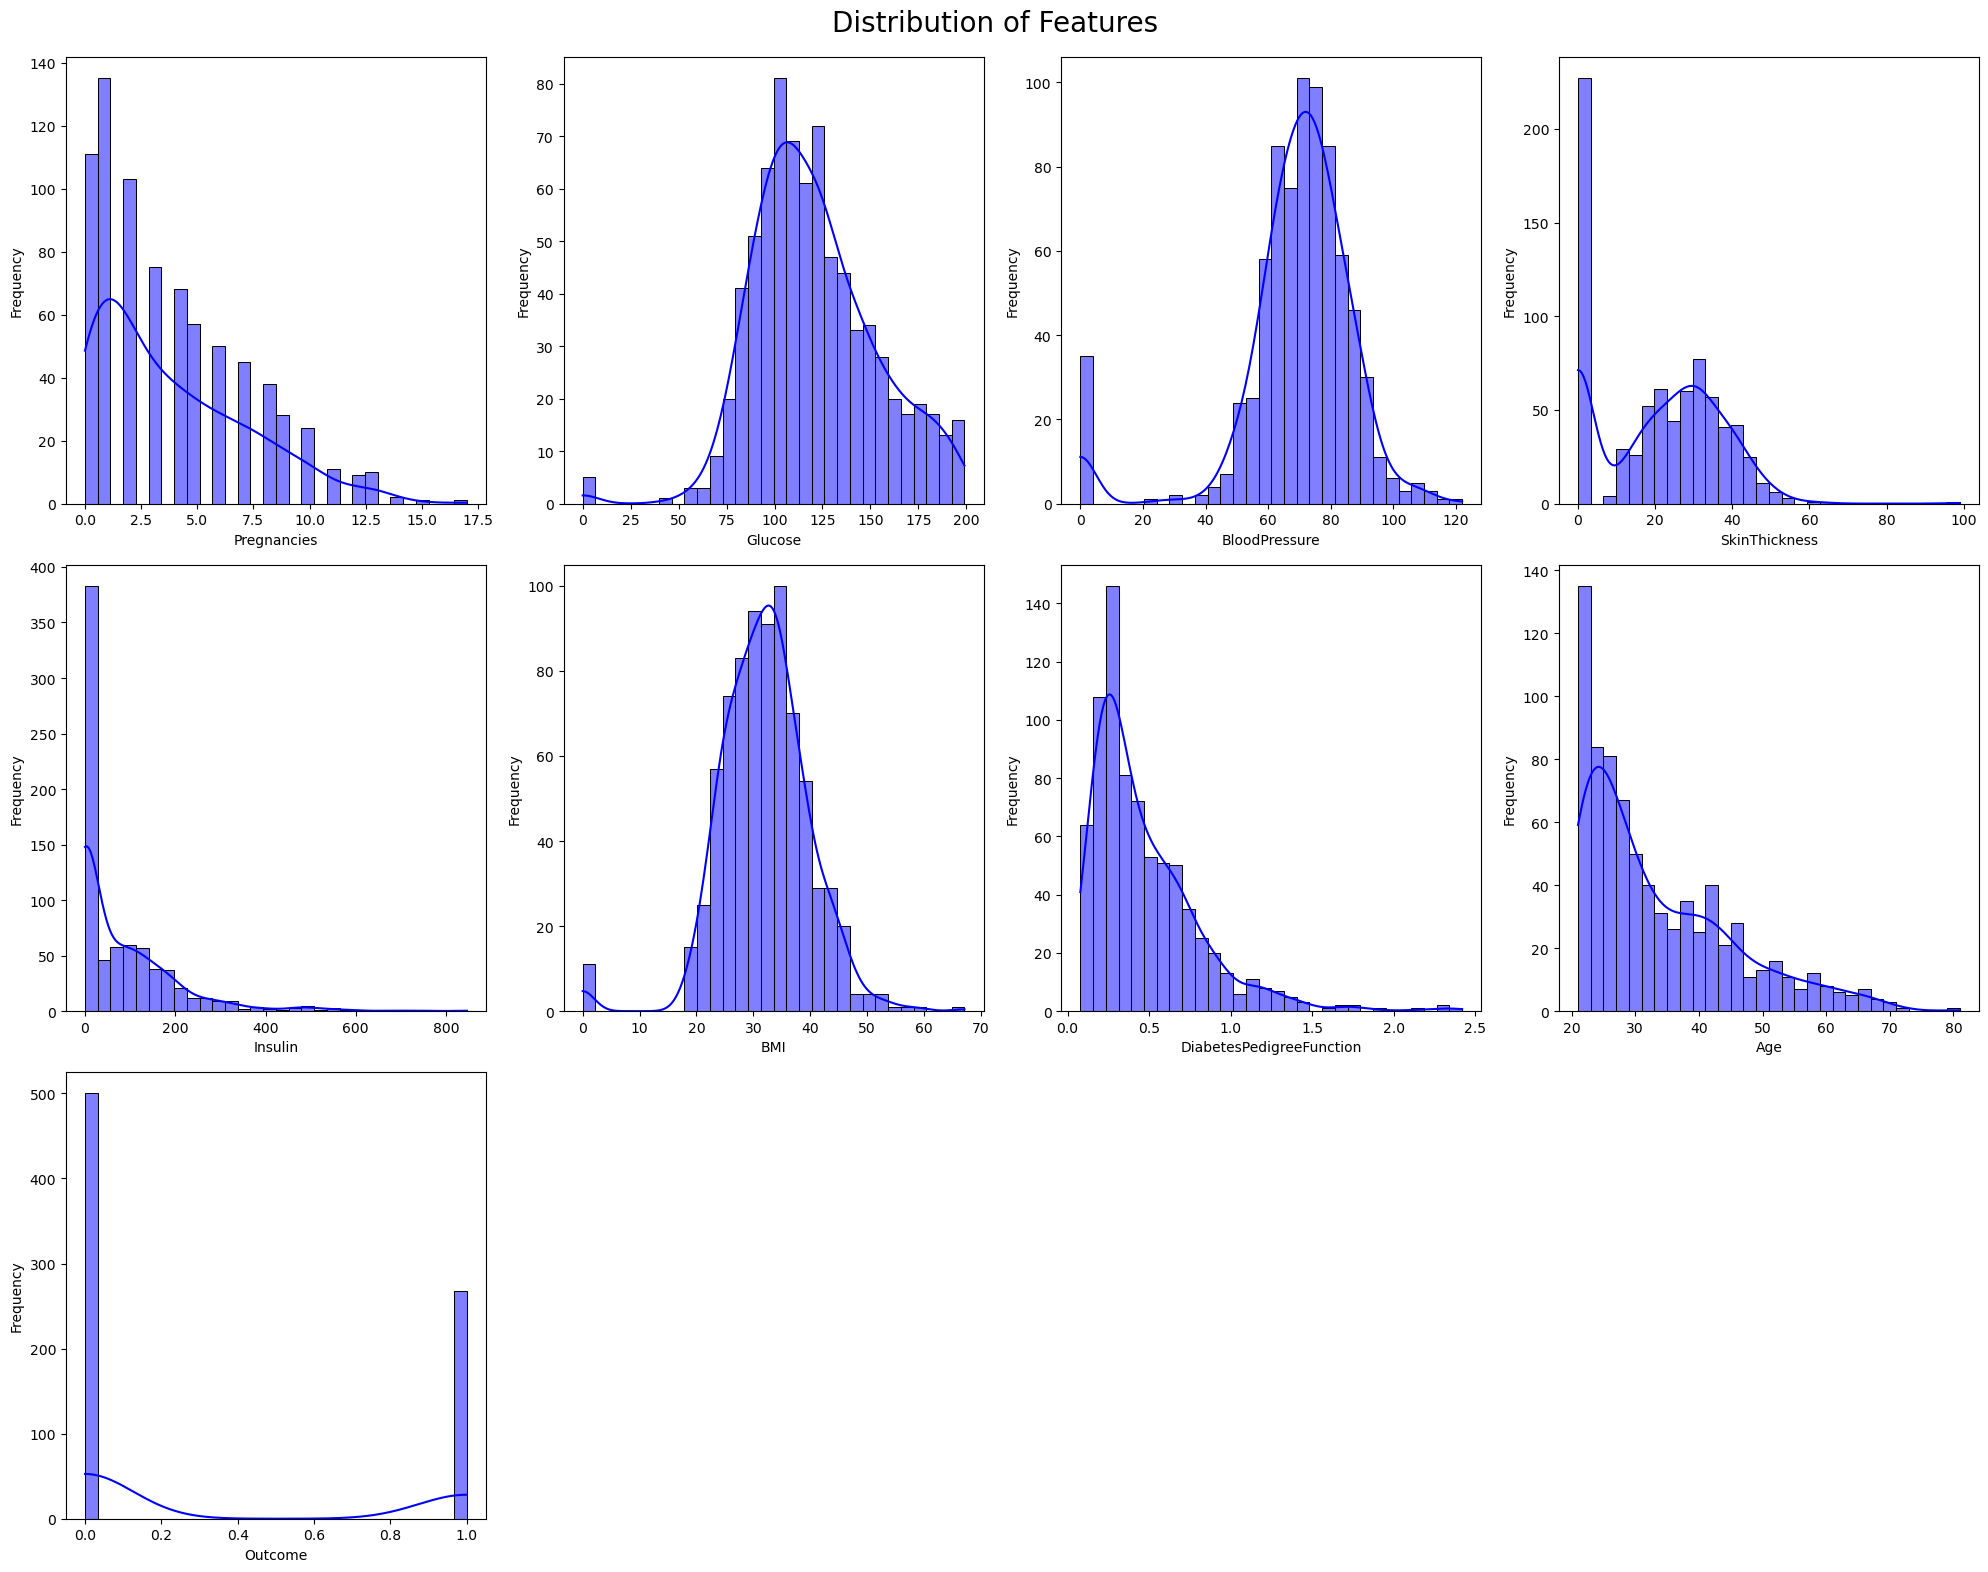

In [8]:
# Distribution of each feature 
num_features = dataset.columns
fig, axes = plt.subplots(nrows=len(num_features)//4 + 1, ncols=4, figsize=(20, 16))
axes = axes.flatten()
for i, feature in enumerate(num_features):
    sns.histplot(dataset[feature], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Distribution of Features", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [9]:
# Extract features and targets
Y = np.array(dataset.Outcome)
X = np.array(dataset.drop(columns=['Outcome']))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training & Evaluation 

In [11]:
# Dictionary of models to train
models = {
    "Logistic Regression (Scratch)": LR_from_scratch(learning_rate=0.01, iterations=1000),
    "Logistic Regression (Sklearn)": LogisticRegression()
}

In [12]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Compute performance metrics
    acc = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    results[name] = {"Accuracy": acc, "F1-Score": f1}

    print(f"\n{name}:")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1-Score: {f1:.2f}")


Logistic Regression (Scratch):
Accuracy: 0.73
F1-Score: 0.64

Logistic Regression (Sklearn):
Accuracy: 0.75
F1-Score: 0.66


In [13]:
# Compare model performance
print("\nModel Performance Comparison:")
performance_df = pd.DataFrame(results).T
print(performance_df)


Model Performance Comparison:
                               Accuracy  F1-Score
Logistic Regression (Scratch)  0.733766  0.637168
Logistic Regression (Sklearn)  0.753247  0.660714



Best Model: Logistic Regression (Sklearn)


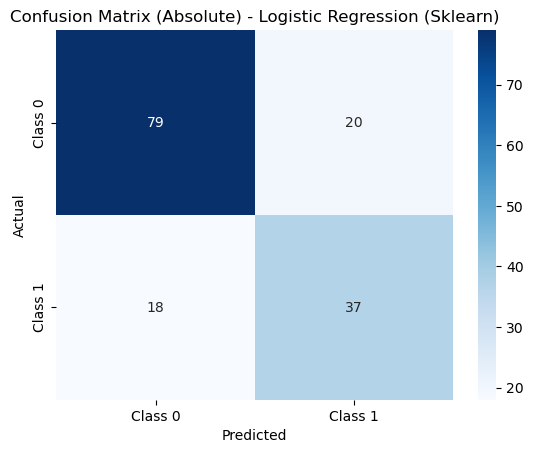

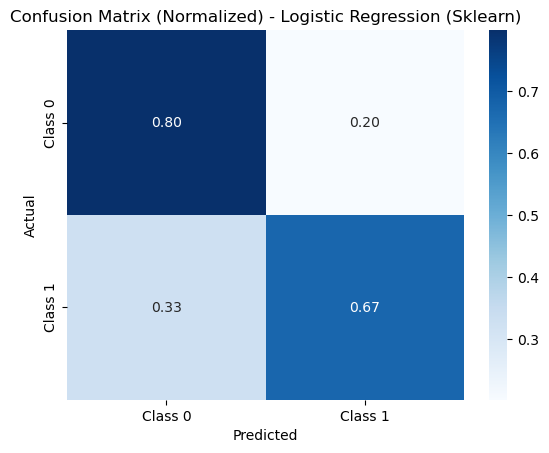

In [14]:
# Visualization of predictions for the best model, Confusion matrix
best_model_name = performance_df["F1-Score"].idxmax()
print(f"\nBest Model: {best_model_name}")

best_model = models[best_model_name]
best_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, best_pred)

# Plot the confusion matrix (absolute values)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title(f"Confusion Matrix (Absolute) - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
# Plot the confusion matrix (normalized values)
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title(f"Confusion Matrix (Normalized) - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()